In [1]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_samples,silhouette_score

In [3]:
#load data 
df=pd.read_csv('data.csv')
df.head

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.drop(columns=['CustomerID','Gender'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [18]:
#Standard Scaling
stdscaling=StandardScaler()
x_scaled=stdscaling.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

In [19]:
X_scaled_df = pd.DataFrame(x_scaled, columns=['Age', 'Annual Income', 'Spending Score'])
X_scaled_df.head

<bound method NDFrame.head of           Age  Annual Income  Spending Score
0   -1.424569      -1.738999       -0.434801
1   -1.281035      -1.738999        1.195704
2   -1.352802      -1.700830       -1.715913
3   -1.137502      -1.700830        1.040418
4   -0.563369      -1.662660       -0.395980
..        ...            ...             ...
195 -0.276302       2.268791        1.118061
196  0.441365       2.497807       -0.861839
197 -0.491602       2.497807        0.923953
198 -0.491602       2.917671       -1.250054
199 -0.635135       2.917671        1.273347

[200 rows x 3 columns]>

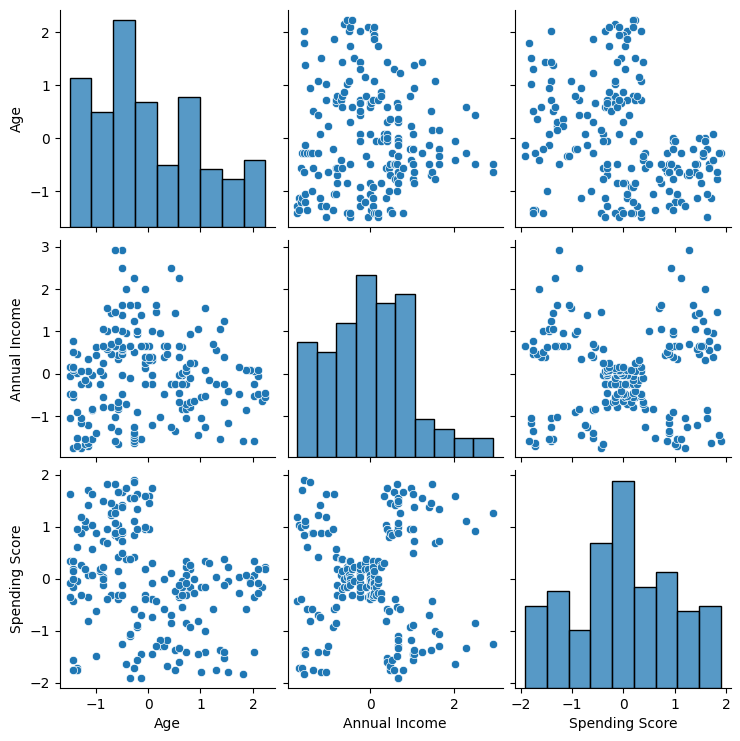

In [21]:
#visualization
sns.pairplot(data=X_scaled_df)
plt.show()


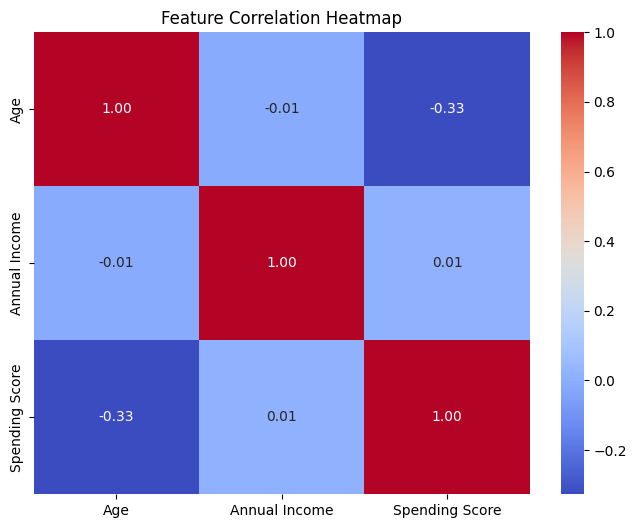

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(X_scaled_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

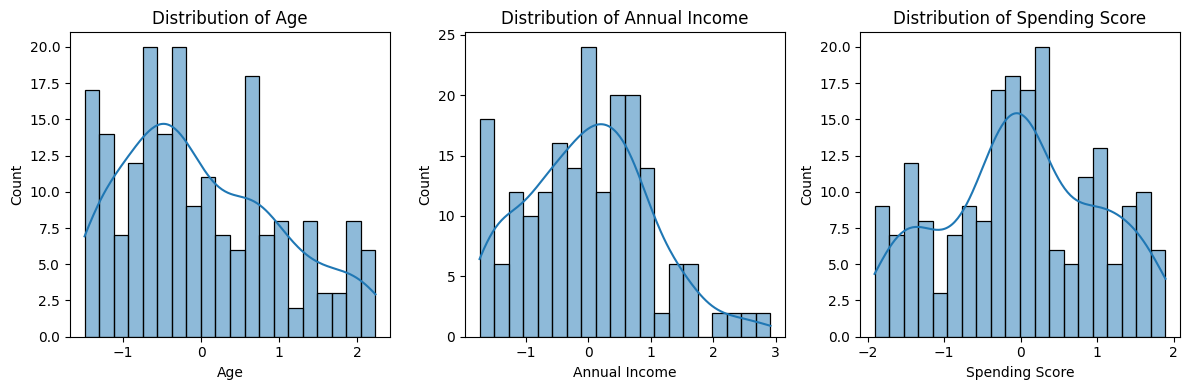

In [23]:
plt.figure(figsize=(12,4))

for i, col in enumerate(X_scaled_df.columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(X_scaled_df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

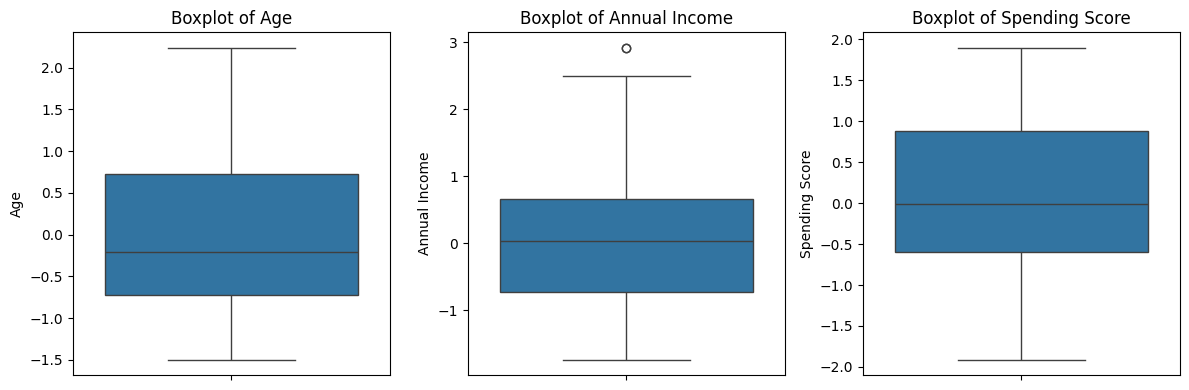

In [24]:
plt.figure(figsize=(12,4))

for i, col in enumerate(X_scaled_df.columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=X_scaled_df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


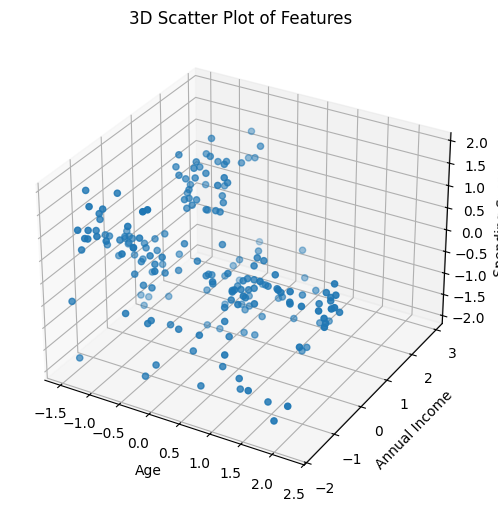

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled_df['Age'], X_scaled_df['Annual Income'], X_scaled_df['Spending Score'])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title("3D Scatter Plot of Features")
plt.show()


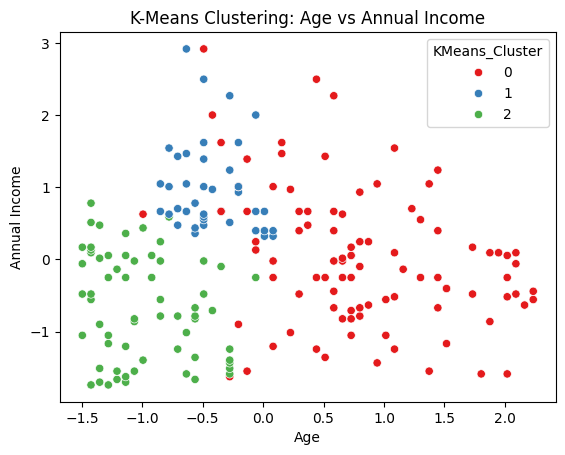

K-Means Silhouette Score: 0.36


In [29]:
# Decide number of clusters (e.g., K=3 for now)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled_df)

# Add cluster labels to DataFrame
X_scaled_df['KMeans_Cluster'] = kmeans_labels

# 2D Scatter Plot for KMeans clusters
sns.scatterplot(x='Age', y='Annual Income', hue='KMeans_Cluster', palette='Set1', data=X_scaled_df)
plt.title("K-Means Clustering: Age vs Annual Income")
plt.show()

score = silhouette_score(X_scaled_df[['Age','Annual Income','Spending Score']], X_scaled_df['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {score:.2f}")

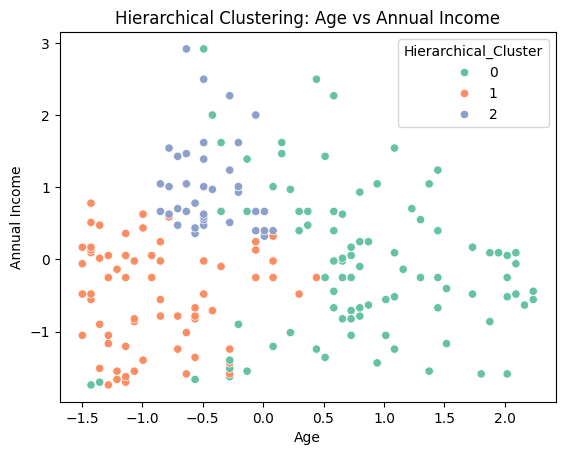

Hierarchical Silhouette Score: 0.32


In [36]:
# Using 3 clusters
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled_df[['Age','Annual Income','Spending Score']])

# Add labels to DataFrame
X_scaled_df['Hierarchical_Cluster'] = agglo_labels

# 2D Scatter Plot
sns.scatterplot(x='Age', y='Annual Income', hue='Hierarchical_Cluster', palette='Set2', data=X_scaled_df)
plt.title("Hierarchical Clustering: Age vs Annual Income")
plt.show()

score_agglo = silhouette_score(X_scaled_df[['Age','Annual Income','Spending Score']], X_scaled_df['Hierarchical_Cluster'])
print(f"Hierarchical Silhouette Score: {score_agglo:.2f}")

Number of clusters (excluding noise): 4


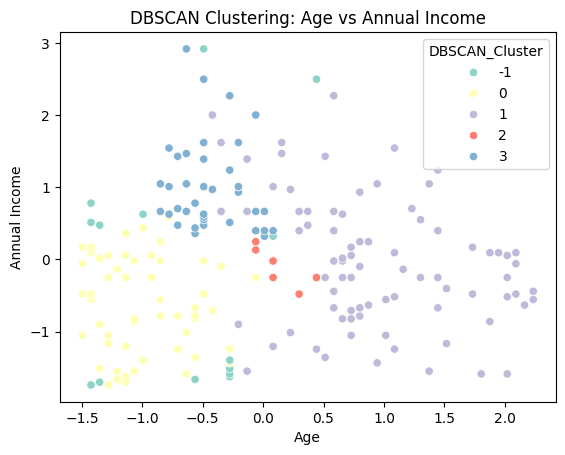

DBSCAN Silhouette Score: 0.10


In [35]:
dbscan = DBSCAN(eps=0.8, min_samples=5)  # Adjust eps for scaled data
dbscan_labels = dbscan.fit_predict(X_scaled_df)
X_scaled_df['DBSCAN_Cluster'] = dbscan_labels

# Count number of clusters (excluding noise)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("Number of clusters (excluding noise):", n_clusters)

# 2D Scatter Plot of clusters
sns.scatterplot(x='Age', y='Annual Income', hue='DBSCAN_Cluster', palette='Set3', data=X_scaled_df)
plt.title("DBSCAN Clustering: Age vs Annual Income")
plt.show()

# Silhouette score (only if ≥2 clusters)
if n_clusters >= 2:
    score_dbscan = silhouette_score(X_scaled_df[['Age','Annual Income','Spending Score']], dbscan_labels)
    print(f"DBSCAN Silhouette Score: {score_dbscan:.2f}")
else:
    print("DBSCAN produced less than 2 clusters. Silhouette Score cannot be computed.")

## Key Insight:

-> K-Means is the most suitable algorithm for your Mall Customer dataset based on silhouette score.

-> DBSCAN can detect outliers, but for 3 continuous numeric features like Age, Income, Spending Score, K-Means gives better overall cluster separation.

-> Silhouette < 0.4 is generally considered moderate; so clusters are not perfectly separated, which is normal for real-world customer data.